In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from procurement_planning import *
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


/usr/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


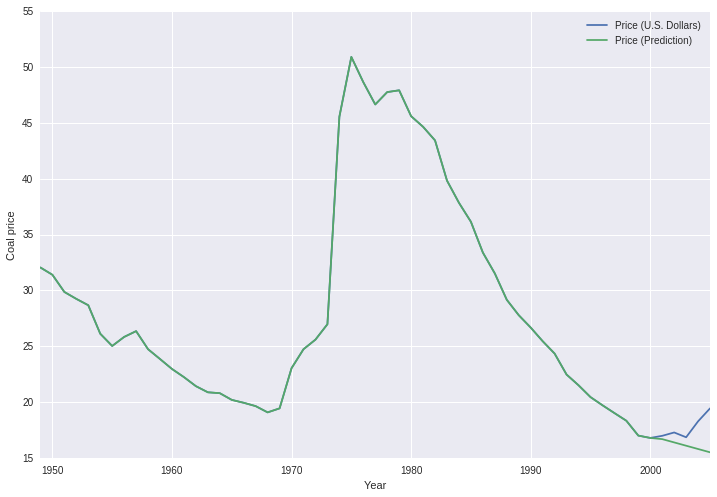

In [2]:
s = pd.read_csv('data/Americal-coal-prices.csv', parse_dates=["Year"])
s.set_index(["Year"], inplace=True)
s.sort_index(ascending=True, inplace=True)

s_tmp = pd.Series.copy(s["Price (U.S. Dollars)"])
forecast, pdq = autoForecast(s_tmp[:-5], 5)
s_tmp[-5:] = forecast[0]

s["Price (Prediction)"] = s_tmp

_, ax = plt.subplots()
s.plot(ax=ax)
ax.set_ylabel("Coal price")
plt.savefig('../paper/Figures/supply.eps', bbox_inches='tight', pad_inches=0, dpi=200)

/usr/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p, d, q =  (1, 2, 0)


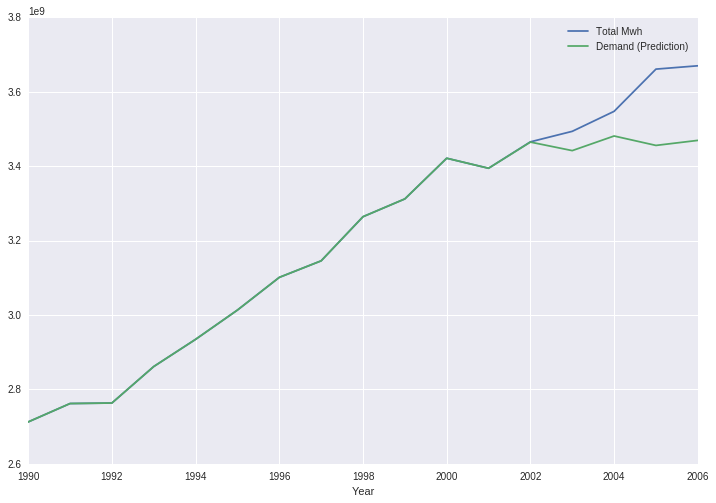

In [3]:
d = pd.read_csv('data/US-electricity-consumption.csv', parse_dates=["Year"])
d.set_index(["Year"], inplace=True)
d.sort_index(ascending=True, inplace=True)

d_tmp = pd.Series.copy(d.ix[:, 0])
forecast, pdq = autoForecast(d_tmp[:-5], 5)
print("p, d, q = ", pdq)
d_tmp[-5:] = forecast[0]

d["Total Mwh (Prediction)"] = d_tmp

d.plot()
ax.set_ylabel("Electricity demand MWh")
plt.savefig('../paper/Figures/demand.png', bbox_inches='tight', pad_inches=0, dpi=200)

In [5]:
optimal_procurement_with_history(s["Price (U.S. Dollars)"][:-5], [1e13]*5, d["Total Mwh"][:-5], 1, 100)

/usr/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0
1
2
3
4


(278443258877.67902,
 array([  3.46480026e+09,   3.44189970e+09,   3.48118765e+09,
          3.45587315e+09,   3.46938426e+09]))